In [1]:
# требуемые пакеты
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Теоретическая часть
## Распространение сигнала
Мощность сигнала $P$ выражается в ваттах ($W$), однако в радиотехнике чаще применяют логарифмическую шкалу (дБ). Это связано с большим диапазоном изменений мощности в беспроводных системах. Логарифмическая форма записи определяется как:
$$
L_{dB} = 10 \log_{10}\!\left(\frac{P}{P_{\text{ref}}}\right)
$$
В качестве опорного значения часто используют 1 милливатт (mW). В этом случае мощность выражают в dBm:
$$
P_{dBm} = 10 \log_{10}\!\left(\frac{P}{1\ \text{mW}}\right)
$$
При распространении в среде сигнал теряет мощность из-за поглощения, рассеяния и геометрического расхождения волнового фронта. Это явление называют затуханием (path loss). Общая модель зависимости получаемой мощности от расстояния имеет вид:
$$
P_r(d) = P_t \cdot \left( \frac{d_0}{d} \right)^n
$$
Где параметры имеют следующие значения:
- $P_r(d)$ — мощность принимаемого сигнала на расстоянии $d$.
- $P_t$ — мощность передатчика.
- $d$ — расстояние от передатчика до приёмника.
- $d_0$ — опорное расстояние (обычно 1 м).
- $n$ — показатель затухания среды (для свободного пространства n≈2, в застройке — до 4 и выше).


In [3]:
Pt = 1.0        # мощность передатчика, Вт
d0 = 1.0        # опорное расстояние, м
N_values = [2, 3, 4]  # разные показатели затухания
D = np.linspace(1, 100, 500)  # расстояния, м

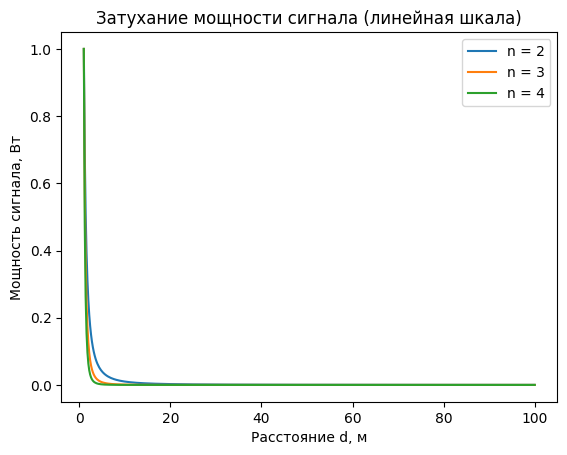

In [4]:
for n in N_values:
    Pr = Pt * (d0 / D)**n
    plt.plot(D, Pr, label=f"n = {n}")

plt.xlabel("Расстояние d, м")
plt.ylabel("Мощность сигнала, Вт")
plt.title("Затухание мощности сигнала (линейная шкала)")
plt.legend()
plt.show()

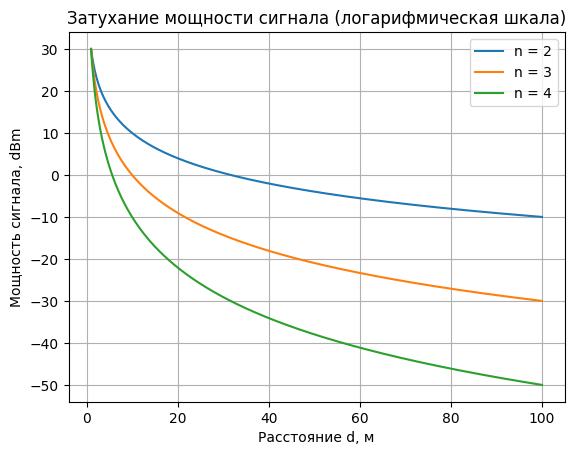

In [5]:
for n in N_values:
    Pr = Pt * (d0 / D)**n
    Pr_dBm = 10 * np.log10(Pr / 1e-3)
    plt.plot(D, Pr_dBm, label=f"n = {n}")

plt.xlabel("Расстояние d, м")
plt.ylabel("Мощность сигнала, dBm")
plt.title("Затухание мощности сигнала (логарифмическая шкала)")
plt.grid(True)
plt.legend()
plt.show()

## Распределение случайной величины - уровня сигнала
В беспроводных сетях уровень принимаемого сигнала не является строго фиксированным и изменяется под влиянием множества факторов: многолучевого распространения, отражений, рассеяния и препятствий на пути сигнала. Поэтому его удобно моделировать как случайную величину.  Его флуктуации зависят от:  
- многолучевого распространения,  
- отражений от объектов,  
- рассеяния и поглощения,  
- препятствий на пути сигнала.

**Случайная величина** — это величина, которая может принимать различные значения с определённой вероятностью. Для количественного описания случайной величины используют **распределение вероятностей**, которое показывает, с какой вероятностью случайная величина принимает те или иные значения.

Для непрерывных случайных величин используют **плотность вероятности (PDF)**, которая удовлетворяет условиям:

$$
f_X(x) \ge 0, \quad \int_{-\infty}^{\infty} f_X(x) dx = 1
$$

где $f_X(x)$ — плотность вероятности случайной величины $X$.

In [6]:
x = np.linspace(0, 5, 500)

### 1 Логнормальное распределение (Lognormal)

Используется для **теневого замирания (shadowing)**, когда сигнал медленно изменяется под влиянием препятствий (здания, деревья, стены). Сумма множества независимых факторов приводит к логнормальному распределению в линейной шкале мощности, что в dB соответствует нормальному распределению.
$$
f_X(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\Bigg(-\frac{(\ln x - \mu)^2}{2\sigma^2}\Bigg), \quad x > 0
$$ 
- $x$ — мощность сигнала,  
- $μ$ — математическое ожидание логарифма мощности,  
- $σ$ — стандартное отклонение логарифма мощности.

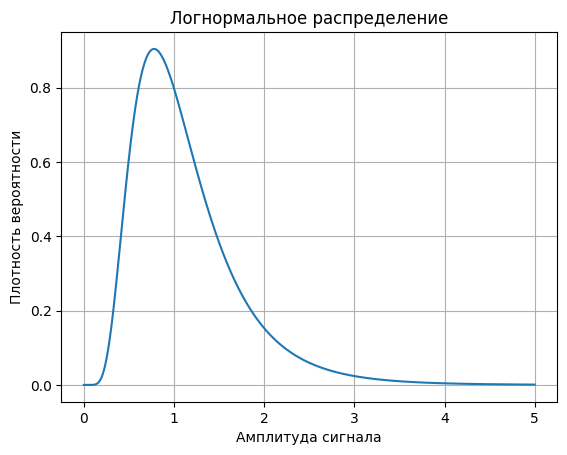

In [7]:
sigma = 0.5
plt.plot(x, sp.stats.lognorm.pdf(x, s=sigma, scale=np.exp(0)))
plt.title("Логнормальное распределение")
plt.xlabel("Амплитуда сигнала")
plt.ylabel("Плотность вероятности")
plt.grid(True)
plt.show()

### 2 Рэлеевское распределение (Rayleigh)

Применяется, когда нет прямой видимости и сигнал формируется множеством отражённых компонент одинаковой амплитуды. Рэлеевское распределение описывает амплитуду сигнала.

$$
f_A(a) = \frac{a}{\sigma^2} e^{-a^2 / (2\sigma^2)}, \quad a \ge 0
$$  
- $a$ — амплитуда сигнала,  
- $σ$ — стандартное отклонение, связанное с средней мощностью сигнала.

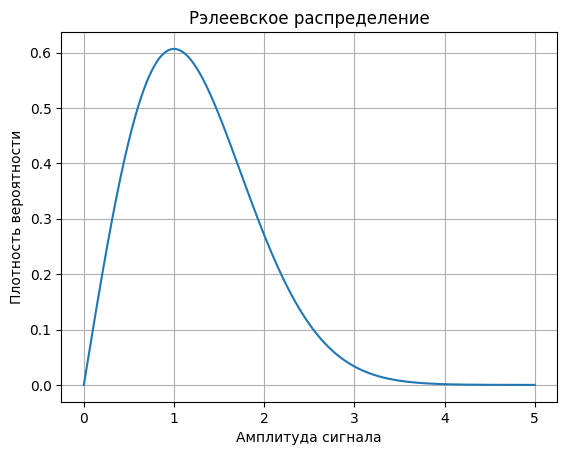

In [8]:
plt.plot(x, sp.stats.rayleigh.pdf(x))
plt.title("Рэлеевское распределение")
plt.xlabel("Амплитуда сигнала")
plt.ylabel("Плотность вероятности")
plt.grid(True)
plt.show()

### 3 Райсовское распределение (Rician)
Используется при наличии прямой видимости плюс многолучевое распространение. Модель учитывает мощный прямой сигнал и отражённые компоненты.
$$
f_A(a) = \frac{a}{\sigma^2} \exp\Bigg(-\frac{a^2 + s^2}{2\sigma^2}\Bigg) I_0\Bigg(\frac{a s}{\sigma^2}\Bigg), \quad a \ge 0
$$
- $a$ — амплитуда сигнала,  
- $σ$ — стандартное отклонение многолучевых компонент,  
- $s$ — амплитуда прямого LOS-сигнала,  
- $I_0$ — модифицированная функция Бесселя нулевого порядка.

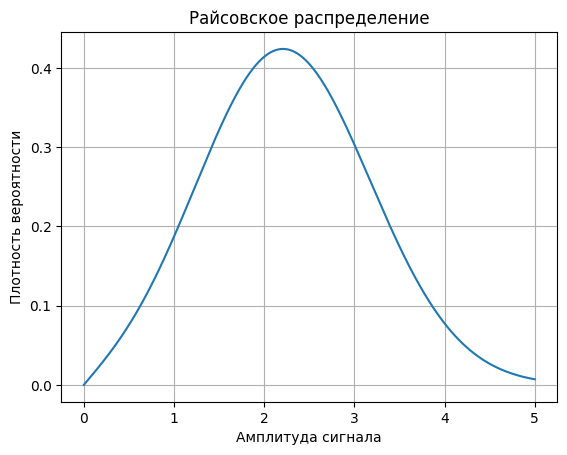

In [9]:
plt.plot(x, sp.stats.rice.pdf(x, b=2.0))
plt.title("Райсовское распределение")
plt.xlabel("Амплитуда сигнала")
plt.ylabel("Плотность вероятности")
plt.grid(True)
plt.show()

### 4 Накагами распределение (Nakagami-m)

Универсальная модель, которая может описывать как слабое, так и сильное флуктуационное замирание. Используется, когда необходимо гибко моделировать разнообразные условия многолучевого распространения.
$$
f_A(a) = \frac{2 m^m}{\Gamma(m) \Omega^m} a^{2m-1} \exp\Bigg(-\frac{m}{\Omega} a^2\Bigg), \quad a \ge 0
$$
- $a$ — амплитуда сигнала,  
- $m$ — параметр формы (m≥0.5),  
- $Ω$ — средняя мощность сигнала,  
- $Γ(m)$ — гамма-функция.


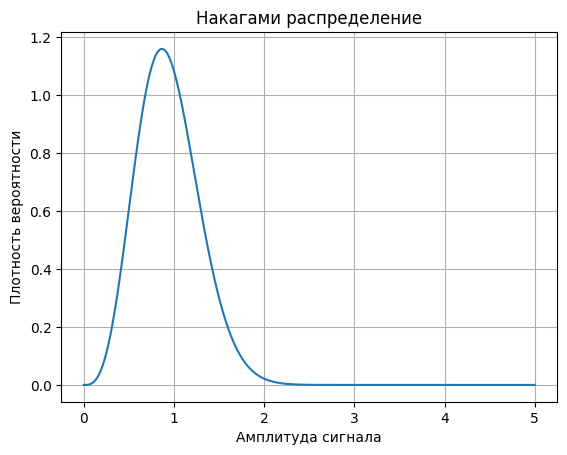

In [10]:
plt.plot(x, sp.stats.nakagami.pdf(x, 2.0))
plt.title("Накагами распределение")
plt.xlabel("Амплитуда сигнала")
plt.ylabel("Плотность вероятности")
plt.grid(True)
plt.show()

### Сравнение плотностей вероятности
1) Логнормальное
2) Райсовское
3) Релейвское
4) Накагами

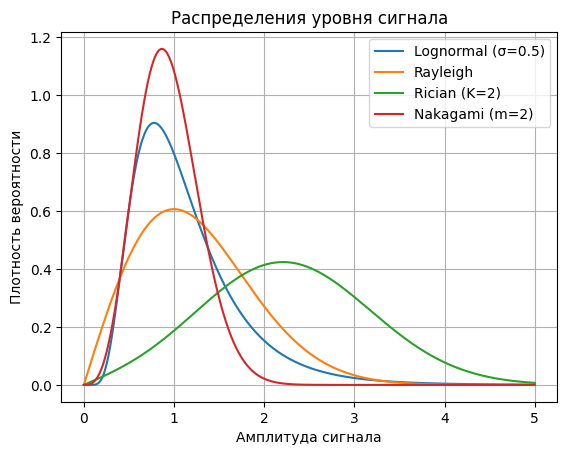

In [11]:
plt.plot(x, sp.stats.lognorm.pdf(x, s=0.5, scale=np.exp(0)), label="Lognormal (σ=0.5)")
plt.plot(x, sp.stats.rayleigh.pdf(x, scale=1.0), label="Rayleigh")
plt.plot(x, sp.stats.rice.pdf(x, b=2.0, scale=1.0), label="Rician (K=2)")
plt.plot(x, sp.stats.nakagami.pdf(x, 2.0), label="Nakagami (m=2)")
plt.xlabel("Амплитуда сигнала")
plt.ylabel("Плотность вероятности")
plt.title("Распределения уровня сигнала")
plt.legend()
plt.grid(True)
plt.show()

# Практическая часть
## Захват Пакетов
Подготовка виртуального интерфейса к захвату:
```shell
sudo iw dev wlp1s0 interface add mon0 type monitor # Зеркалировать интерфейс в мониторном режиме
sudo ip link set mon0 up # Включить интерфейс
sudo iw dev mon0 del # Удалить старый интерфейс
```
Захват wifi пакетов осуществляется при помощи утилиты tshark, в csv файл записывается временная метка (секунды с 1970го года), MAC адрес источника пакета, уровень сигнала (dBm):
```shell
sudo tshark -i mon0 -T fields \
  -e frame.time_epoch \
  -e wlan.sa \
  -e radiotap.dbm_antsignal \
  -Y "wlan.sa && radiotap.dbm_antsignal" \
  -E header=y -E separator=, -E quote=d -E occurrence=f \
  > wifi_data.csv
```
## Выборка значений

In [19]:
# Чтение информации о пакетах
data = pd.read_csv('wifi_52k_data.csv')
data = data.rename(columns={
    'frame.time_epoch': 'timestamp',
    'wlan.sa': 'mac',
    'radiotap.dbm_antsignal': 'signal_log'
})
data['timestamp'] = pd.to_numeric(data['timestamp']) # Преобразование строк в числа
data['signal_log'] = pd.to_numeric(data['signal_log']) # Уровень сигнала в дБмВт
data['signal_linear'] = pd.to_numeric(1e-3 * 10 ** (data['signal_log'] / 10)) # Уровень сигнала в Вт

In [24]:
# Выборка источников сигнала
print(data['mac'].value_counts()[:20]) # Спискок устройств с наибольшим количеством записей
# wifi_52k_data
# mac_list = ['d4:01:c3:b3:cf:9f'] # скачок уровня сигнала
# mac_list = ['b8:ea:98:43:44:0c'] # Значение сильно колеблется
# mac_list = ['2c:3e:cf:3b:b3:52'] # похоже на Логнормальное
# mac_list = ['64:d1:54:4c:e4:d5'] # Периодически появляющийся сигнал
# mac_list = ['d4:d8:53:2a:36:e5'] # Два выраженных источника сигнала
mac_list = ['2c:3e:cf:3b:b3:5d'] # Красивая гистограмма
# mac_list = ['d6:15:6a:ac:01:10'] # Периодически появляющийся сигнал
# mac_list = ['76:33:91:94:cc:73'] # Узкий диапазон значений
# mac_list = ['c8:4c:75:be:8e:00'] # Скачок
# mac_list = ['84:3d:c6:ec:14:89'] # Снова скачок
# mac_list = ['64:d1:54:4c:e4:d9'] # Не красивое временное представление, но хорошая гистограмма
# mac_list = ['3e:75:02:40:d6:e6'] # Передвигающийся источник
# wifi_729k_data
# mac_list = ['3c:64:cf:eb:81:d1'] # гистограмма ок
# mac_list = ['50:64:2b:63:57:6f'] # гистограмма хорошая
# mac_list = ['3a:64:cf:eb:81:d1'] # Два источника 
# mac_list = ['64:64:4a:9b:60:d1'] # Два источника
# mac_list = ['52:70:cb:f1:c8:7c'] # Скачки уровня сигнала
# mac_list = ['50:64:2b:63:57:6d'] # Два источника
# mac_list = ['e2:7a:fa:bf:c0:d7'] # Два источника
# mac_list = ['3c:64:cf:eb:81:d0'] # гистограмма ок
# mac_list = ['64:cb:e9:68:b2:34'] # Два источника
# mac_list = ['f8:f0:82:4f:a9:48'] # Два источника

mac
d4:01:c3:b3:cf:9f    11019
b8:ea:98:43:44:0c     9915
2c:3e:cf:3b:b3:52     5325
64:d1:54:4c:e4:d5     3400
d4:d8:53:2a:36:e5     3140
2c:3e:cf:3b:b3:5d     3037
d6:15:6a:ac:01:10     2721
76:33:91:94:cc:73     2463
c8:4c:75:be:8e:00     2414
84:3d:c6:ec:14:89     2220
64:d1:54:4c:e4:d9     1723
3e:75:02:40:d6:e6     1494
e6:a4:02:04:5a:c6      722
00:00:00:00:00:00      649
d8:12:65:5c:7d:c6      304
06:e4:1e:2e:0f:aa      226
40:f5:20:32:ac:2b      204
2c:3e:cf:3b:b3:5f      203
2c:3e:cf:3b:b3:5e      186
04:f4:d8:f9:57:08      138
Name: count, dtype: int64


## Построение графиков

In [25]:
# Функция построения изменения уровня сигнала переданных устройств во времени
def func(mac_list, column='signal_log'):
    for mac in mac_list:
        mac_data = data[data['mac'] == mac]
        plt.plot(mac_data['timestamp'], mac_data[column], label=mac)
    plt.xlabel('Временная метка')
    plt.ylabel('Уровень сигнала (дБмВт) / (Вт)')
    plt.title('Уровень сигнала от времени')
    plt.legend()
    plt.show()

# Функция построения гистограммы значечений уровня сигнала переданных устройств
def hist(mac_list, column='signal_linear'):
    for mac in mac_list:
        mac_data = data[data['mac'] == mac]
        plt.hist(mac_data[column], bins=100, label=mac)
    plt.title("Гистограмма уровня сигнала")
    plt.xlabel('Уровень сигнала (дБмВт) / (Вт)')
    plt.ylabel("Количество значений")
    plt.legend()
    plt.show()


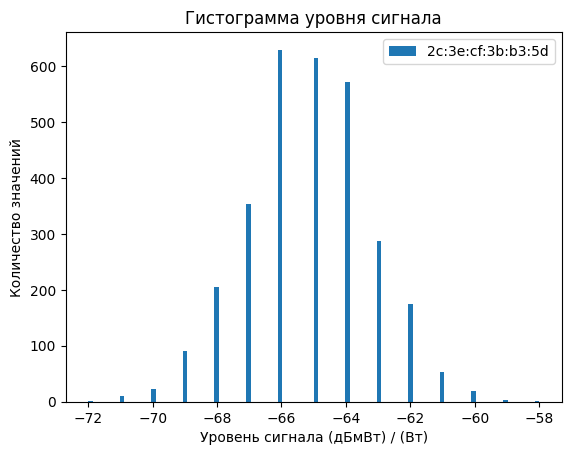

In [26]:
hist(mac_list, 'signal_log')

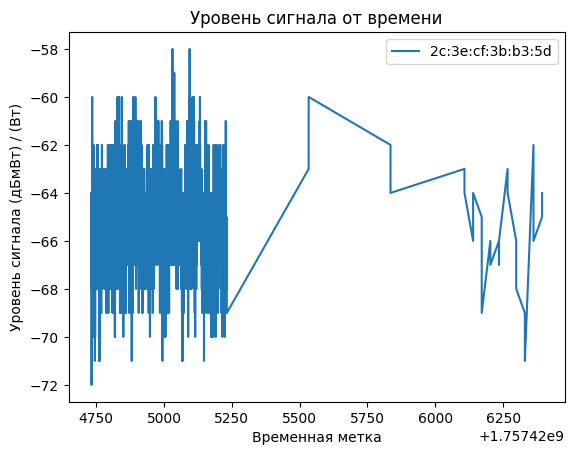

In [27]:
func(mac_list, 'signal_log')

In [16]:
# Сравнения Калмагорова-Смирнова Кульбок-Лейблер
# Ищем нормальное распределение или Хи-квадрат